In [1]:
import transformers

C:\Users\kshantam\AppData\Local\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
!pip install timesfm[torch]

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached einshape-1.0-py3-none-any.whl.metadata (706 bytes)
  Using cached InquirerPy-0.3.4-py3-none-any.whl.metadata (8.1 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of jax[cuda12] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax[cuda12] to determine which version is compatible with other requirements. This could take a while.
  Using cached jax-0.4.26-py3-none-any.whl.metadata (23 kB)
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)


In [1]:
import pandas as pd

In [2]:
import timesfm

TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.


In [5]:
!pip install jax

  Using cached jax-0.4.35-py3-none-any.whl.metadata (22 kB)
  Using cached jaxlib-0.4.35-cp311-cp311-win_amd64.whl.metadata (1.0 kB)
  Using cached ml_dtypes-0.5.0-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.5 MB ? eta -:--:--
   -------------- ------------------------- 20.7/56.5 MB 100.2 MB/s eta 0:00:01
   ------------------------------ --------- 43.8/56.5 MB 106.9 MB/s eta 0:00:01
   ---------------------------------------  56.4/56.5 MB 96.9 MB/s eta 0:00:01
   ---------------------------------------  56.4/56.5 MB 96.9 MB/s eta 0:00:01
   ---------------------------------------  56.4/56.5 MB 96.9 MB/s eta 0:00:01
   ---------------------------------------  56.4/56.5 MB 96.9 MB/s eta 0:00:01
   -------------------------------

In [14]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=7,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
import pandas as pd

input_df = pd.read_csv('sample_data.csv', parse_dates=['ds'])

forecast_df = tfm.forecast_on_df(
    inputs=input_df,
    freq="D",  # monthly
    value_name="y",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [16]:
forecast_df

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,Development,2024-02-10,150.334686,144.405823,146.481918,147.931747,149.153320,150.334686,151.712708,153.095627,154.672882,157.167007
1,Development,2024-02-11,159.920593,153.569565,155.864090,157.383362,158.682602,159.920593,161.296478,162.637665,164.442703,167.003616
2,Development,2024-02-12,150.671890,143.955780,146.175690,147.826279,149.218430,150.671890,151.981247,153.424011,155.317474,157.934235
3,Development,2024-02-13,159.811584,153.118790,155.435547,157.067810,158.509506,159.811584,161.232513,162.841324,164.697937,167.340515
4,Development,2024-02-14,150.803528,143.962570,146.360580,148.006470,149.459045,150.803528,152.220673,153.834976,155.662827,158.455368
5,Development,2024-02-15,159.889938,153.083008,155.337189,157.043106,158.538162,159.889938,161.453522,163.056091,164.922134,167.620850
6,Development,2024-02-16,151.136978,144.168335,146.470566,148.276688,149.751129,151.136978,152.550522,154.186462,156.056686,158.911621
7,Production,2024-02-10,472.390289,450.889465,458.559326,463.987549,468.080139,472.390289,476.505920,480.681946,485.771088,492.825745
8,Production,2024-02-11,471.320709,449.027924,457.021667,462.475952,467.111969,471.320709,475.326813,479.674469,484.678650,492.550049
9,Production,2024-02-12,471.451904,448.293488,456.479004,462.019653,466.813965,471.451904,475.717590,480.002472,485.832672,493.864410


In [17]:
forecast_df.to_csv('Output_Forecast.csv',index=False)

In [10]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   unique_id      21 non-null     object        
 1   ds             21 non-null     datetime64[ns]
 2   timesfm        21 non-null     float32       
 3   timesfm-q-0.1  21 non-null     float32       
 4   timesfm-q-0.2  21 non-null     float32       
 5   timesfm-q-0.3  21 non-null     float32       
 6   timesfm-q-0.4  21 non-null     float32       
 7   timesfm-q-0.5  21 non-null     float32       
 8   timesfm-q-0.6  21 non-null     float32       
 9   timesfm-q-0.7  21 non-null     float32       
 10  timesfm-q-0.8  21 non-null     float32       
 11  timesfm-q-0.9  21 non-null     float32       
dtypes: datetime64[ns](1), float32(10), object(1)
memory usage: 1.3+ KB


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def calculate_comprehensive_metrics(forecast_df, verification_df):
    """
    Calculate comprehensive forecast evaluation metrics
    
    Metrics included:
    1. Mean Absolute Error (MAE)
    2. Mean Absolute Percentage Error (MAPE)
    3. Root Mean Squared Error (RMSE)
    4. Mean Bias Error (MBE)
    5. Symmetric Mean Absolute Percentage Error (sMAPE)
    6. R-squared (Coefficient of Determination)
    7. Peak Detection Accuracy
    """
    unique_ids = forecast_df['unique_id'].unique()
    forecast_columns = [col for col in forecast_df.columns 
                        if col not in ['unique_id', 'ds']]
    
    comprehensive_metrics = {}
    
    for unique_id in unique_ids:
        comprehensive_metrics[unique_id] = {}
        
        # Filter data for the current unique_id
        forecast_subset = forecast_df[forecast_df['unique_id'] == unique_id]
        verification_subset = verification_df[verification_df['unique_id'] == unique_id]
        
        # Reset index to ensure alignment
        forecast_subset = forecast_subset.reset_index(drop=True)
        verification_subset = verification_subset.reset_index(drop=True)
        
        for col in forecast_columns:
            # Actual values
            y_true = verification_subset['y'].values
            y_pred = forecast_subset[col].values
            
            # Calculate metrics
            metrics = {}
            
            # 1. Mean Absolute Error (MAE)
            metrics['MAE'] = mean_absolute_error(y_true, y_pred)
            
            # 2. Mean Absolute Percentage Error (MAPE)
            metrics['MAPE'] = mean_absolute_percentage_error(y_true, y_pred) * 100
            
            # 3. Root Mean Squared Error (RMSE)
            metrics['RMSE'] = np.sqrt(mean_squared_error(y_true, y_pred))
            
            # 4. Mean Bias Error (MBE)
            metrics['MBE'] = np.mean(y_pred - y_true)
            
            # 5. Symmetric Mean Absolute Percentage Error (sMAPE)
            metrics['sMAPE'] = np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100
            
            # 6. R-squared (Coefficient of Determination)
            ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
            ss_residual = np.sum((y_true - y_pred) ** 2)
            metrics['R-squared'] = 1 - (ss_residual / ss_total)
            
            # 7. Peak Detection Accuracy
            def detect_peaks(arr):
                """Detect peaks in the time series"""
                return np.where((arr[1:-1] > arr[:-2]) & (arr[1:-1] > arr[2:]))[0] + 1
            
            true_peaks = detect_peaks(y_true)
            pred_peaks = detect_peaks(y_pred)
            
            # Calculate peak detection accuracy
            correct_peaks = len(set(true_peaks) & set(pred_peaks))
            metrics['Peak Detection Accuracy'] = correct_peaks / len(true_peaks) * 100 if len(true_peaks) > 0 else 0
            
            comprehensive_metrics[unique_id][col] = metrics
    
    # Print metrics in a formatted way
    for unique_id, model_metrics in comprehensive_metrics.items():
        print(f"\n{'='*50}")
        print(f"Evaluation Metrics for {unique_id}")
        print(f"{'='*50}")
        
        for model, metrics in model_metrics.items():
            print(f"\n{model}:")
            for metric_name, metric_value in metrics.items():
                print(f"  {metric_name}: {metric_value:.4f}")
    
    return comprehensive_metrics

In [19]:
def plot_metrics_comparison(comprehensive_metrics):
    """
    Create a visualization of metrics across different models and unique_ids
    """
    # Prepare data for plotting
    metric_names = ['MAE', 'RMSE', 'MAPE', 'sMAPE']
    
    for unique_id, models in comprehensive_metrics.items():
        # Create subplot for each unique_id
        plt.figure(figsize=(15, 8))
        
        # Prepare data
        metric_values = {metric: [] for metric in metric_names}
        model_names = []
        
        for model, metrics in models.items():
            model_names.append(model)
            for metric in metric_names:
                metric_values[metric].append(metrics[metric])
        
        # Plot bar chart
        x = np.arange(len(model_names))
        width = 0.2
        
        plt.figure(figsize=(12, 6))
        for i, metric in enumerate(metric_names):
            plt.bar(x + i*width, metric_values[metric], width, label=metric)
        
        plt.title(f'Metrics Comparison - {unique_id}')
        plt.xlabel('Models')
        plt.ylabel('Metric Value')
        plt.xticks(x + width*1.5, model_names, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()


Evaluation Metrics for Development

timesfm:
  MAE: 1.6588
  MAPE: 1.0732
  RMSE: 1.9969
  MBE: 0.3927
  sMAPE: 1.0699
  R-squared: 0.8428
  Peak Detection Accuracy: 100.0000

timesfm-q-0.1:
  MAE: 6.2223
  MAPE: 4.0187
  RMSE: 6.5679
  MBE: -6.2223
  sMAPE: 4.1100
  R-squared: -0.7004
  Peak Detection Accuracy: 100.0000

timesfm-q-0.2:
  MAE: 3.9563
  MAPE: 2.5484
  RMSE: 4.4875
  MBE: -3.9563
  sMAPE: 2.5904
  R-squared: 0.2062
  Peak Detection Accuracy: 100.0000

timesfm-q-0.3:
  MAE: 2.5292
  MAPE: 1.6216
  RMSE: 3.0992
  MBE: -2.3264
  sMAPE: 1.6411
  R-squared: 0.6214
  Peak Detection Accuracy: 100.0000

timesfm-q-0.4:
  MAE: 1.9187
  MAPE: 1.2333
  RMSE: 2.2047
  MBE: -0.9297
  sMAPE: 1.2395
  R-squared: 0.8084
  Peak Detection Accuracy: 100.0000

timesfm-q-0.5:
  MAE: 1.6588
  MAPE: 1.0732
  RMSE: 1.9969
  MBE: 0.3927
  sMAPE: 1.0699
  R-squared: 0.8428
  Peak Detection Accuracy: 100.0000

timesfm-q-0.6:
  MAE: 2.1201
  MAPE: 1.3821
  RMSE: 2.6379
  MBE: 1.8040
  sMAPE: 1.3681

<Figure size 1500x800 with 0 Axes>

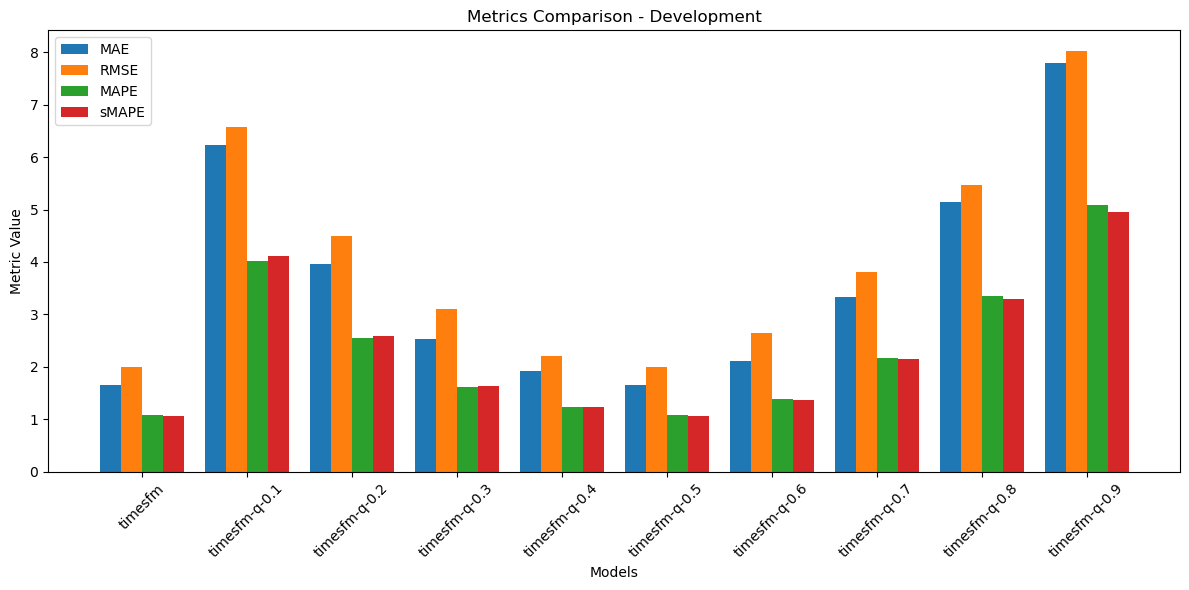

<Figure size 1500x800 with 0 Axes>

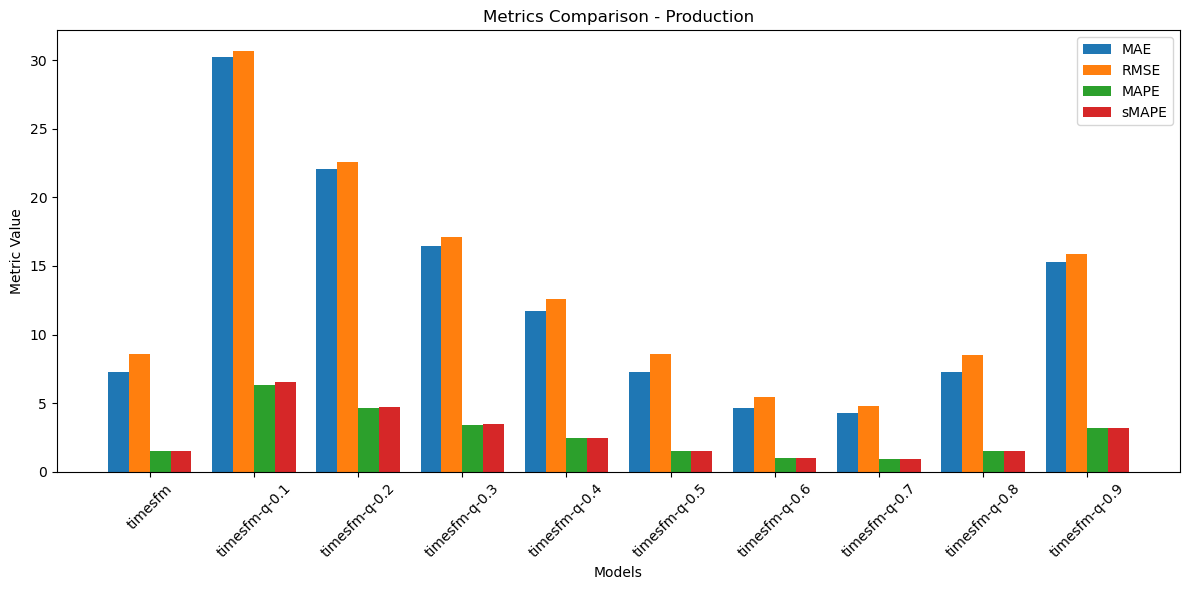

<Figure size 1500x800 with 0 Axes>

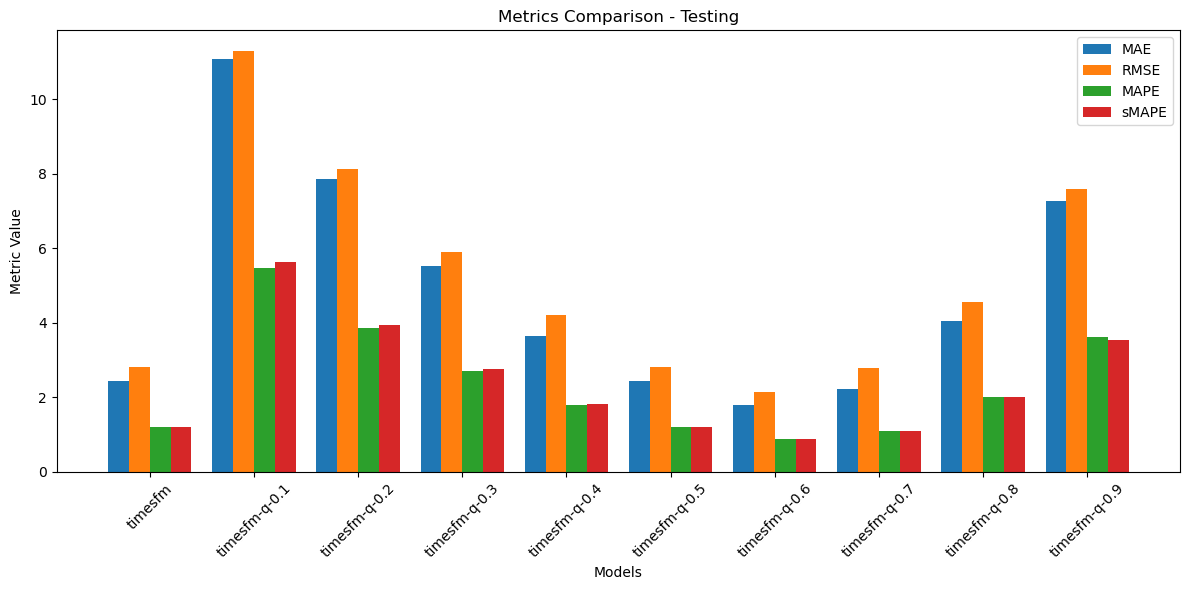

In [20]:
forecast_df = pd.read_csv('Output_forecast.csv')
verification_df = pd.read_csv('verify_data.csv')

# Calculate comprehensive metrics
comprehensive_metrics = calculate_comprehensive_metrics(forecast_df, verification_df)

# Plot metrics comparison
plot_metrics_comparison(comprehensive_metrics)

In [21]:
def plot_autocorrelation(verification_file):
    """
    Plot Autocorrelation and Partial Autocorrelation Function
    
    Parameters:
    - verification_file: Path to verification CSV
    """
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    # Read verification data
    verification_df = pd.read_csv(verification_file)
    
    # Get unique unique_ids
    unique_ids = verification_df['unique_id'].unique()
    
    # Prepare the plot
    plt.figure(figsize=(20, 15))
    
    # Create subplots for each unique_id
    for idx, unique_id in enumerate(unique_ids, 1):
        # Filter data for the current unique_id
        subset = verification_df[verification_df['unique_id'] == unique_id]
        
        # Subplot for ACF
        plt.subplot(len(unique_ids), 2, 2*idx-1)
        plot_acf(subset['y'], lags=10, title=f'Autocorrelation Function - {unique_id}')
        
        # Subplot for PACF
        plt.subplot(len(unique_ids), 2, 2*idx)
        plot_pacf(subset['y'], lags=10, title=f'Partial Autocorrelation Function - {unique_id}')
    
    plt.tight_layout()
    plt.show()

In [22]:
def plot_rolling_mean_forecast(forecast_file, verification_file, window_size=3):
    """
    Create rolling mean plots for forecast models
    
    Parameters:
    - forecast_file: Path to forecast CSV
    - verification_file: Path to verification CSV
    - window_size: Size of the rolling window (default 3)
    """
    # Read CSV files
    forecast_df = pd.read_csv(forecast_file)
    verification_df = pd.read_csv(verification_file)
    
    # Get unique unique_ids
    unique_ids = forecast_df['unique_id'].unique()
    
    # Prepare the plot
    plt.figure(figsize=(20, 15))
    
    # Create subplots for each unique_id
    for idx, unique_id in enumerate(unique_ids, 1):
        plt.subplot(len(unique_ids), 1, idx)
        
        # Filter data for the current unique_id
        forecast_subset = forecast_df[forecast_df['unique_id'] == unique_id]
        verification_subset = verification_df[verification_df['unique_id'] == unique_id]
        
        # Sort by date to ensure correct rolling mean
        forecast_subset = forecast_subset.sort_values('ds')
        verification_subset = verification_subset.sort_values('ds')
        
        # Plot actual values
        plt.plot(forecast_subset['ds'], verification_subset['y'], 
                 label='Actual', color='black', marker='o', linestyle='-', linewidth=2)
        
        # Calculate rolling mean for actual values
        rolling_actual = verification_subset['y'].rolling(window=window_size, center=True).mean()
        plt.plot(forecast_subset['ds'], rolling_actual, 
                 label=f'Actual Rolling Mean (window={window_size})', 
                 color='black', linestyle='--', alpha=0.7)
        
        # Get forecast columns (excluding 'unique_id' and 'ds')
        forecast_columns = [col for col in forecast_df.columns 
                            if col not in ['unique_id', 'ds']]
        
        # Color palette for different forecasts
        colors = plt.cm.tab10(np.linspace(0, 1, len(forecast_columns)))
        
        # Plot each forecast and its rolling mean
        for col, color in zip(forecast_columns, colors):
            # Plot forecast
            plt.plot(forecast_subset['ds'], forecast_subset[col], 
                     label=col, color=color, linestyle='--')
            
            # Calculate and plot rolling mean for forecast
            rolling_forecast = forecast_subset[col].rolling(window=window_size, center=True).mean()
            plt.plot(forecast_subset['ds'], rolling_forecast, 
                     label=f'{col} Rolling Mean', 
                     color=color, linestyle=':', alpha=0.7)
        
        plt.title(f'Forecast Performance with Rolling Mean (Window = {window_size}) - {unique_id}')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
    
    plt.show()

def plot_residuals(forecast_file, verification_file):
    """
    Create residual plots for each forecast model
    
    Parameters:
    - forecast_file: Path to forecast CSV
    - verification_file: Path to verification CSV
    """
    # Read CSV files
    forecast_df = pd.read_csv(forecast_file)
    verification_df = pd.read_csv(verification_file)
    
    # Get unique unique_ids
    unique_ids = forecast_df['unique_id'].unique()
    
    # Prepare the plot
    plt.figure(figsize=(20, 15))
    
    # Create subplots for each unique_id
    for idx, unique_id in enumerate(unique_ids, 1):
        plt.subplot(len(unique_ids), 1, idx)
        
        # Filter data for the current unique_id
        forecast_subset = forecast_df[forecast_df['unique_id'] == unique_id]
        verification_subset = verification_df[verification_df['unique_id'] == unique_id]
        
        # Sort by date to ensure correct alignment
        forecast_subset = forecast_subset.sort_values('ds')
        verification_subset = verification_subset.sort_values('ds')
        
        # Get forecast columns (excluding 'unique_id' and 'ds')
        forecast_columns = [col for col in forecast_df.columns 
                            if col not in ['unique_id', 'ds']]
        
        # Color palette for different forecasts
        colors = plt.cm.tab10(np.linspace(0, 1, len(forecast_columns)))
        
        # Calculate and plot residuals for each forecast model
        for col, color in zip(forecast_columns, colors):
            # Calculate residuals
            residuals = verification_subset['y'] - forecast_subset[col]
            
            # Plot residuals
            plt.plot(forecast_subset['ds'], residuals, 
                     label=f'{col} Residuals', color=color, marker='o', linestyle='')
        
        plt.title(f'Residuals Plot - {unique_id}')
        plt.xlabel('Date')
        plt.ylabel('Residual (Actual - Forecast)')
        plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
    
    plt.show()

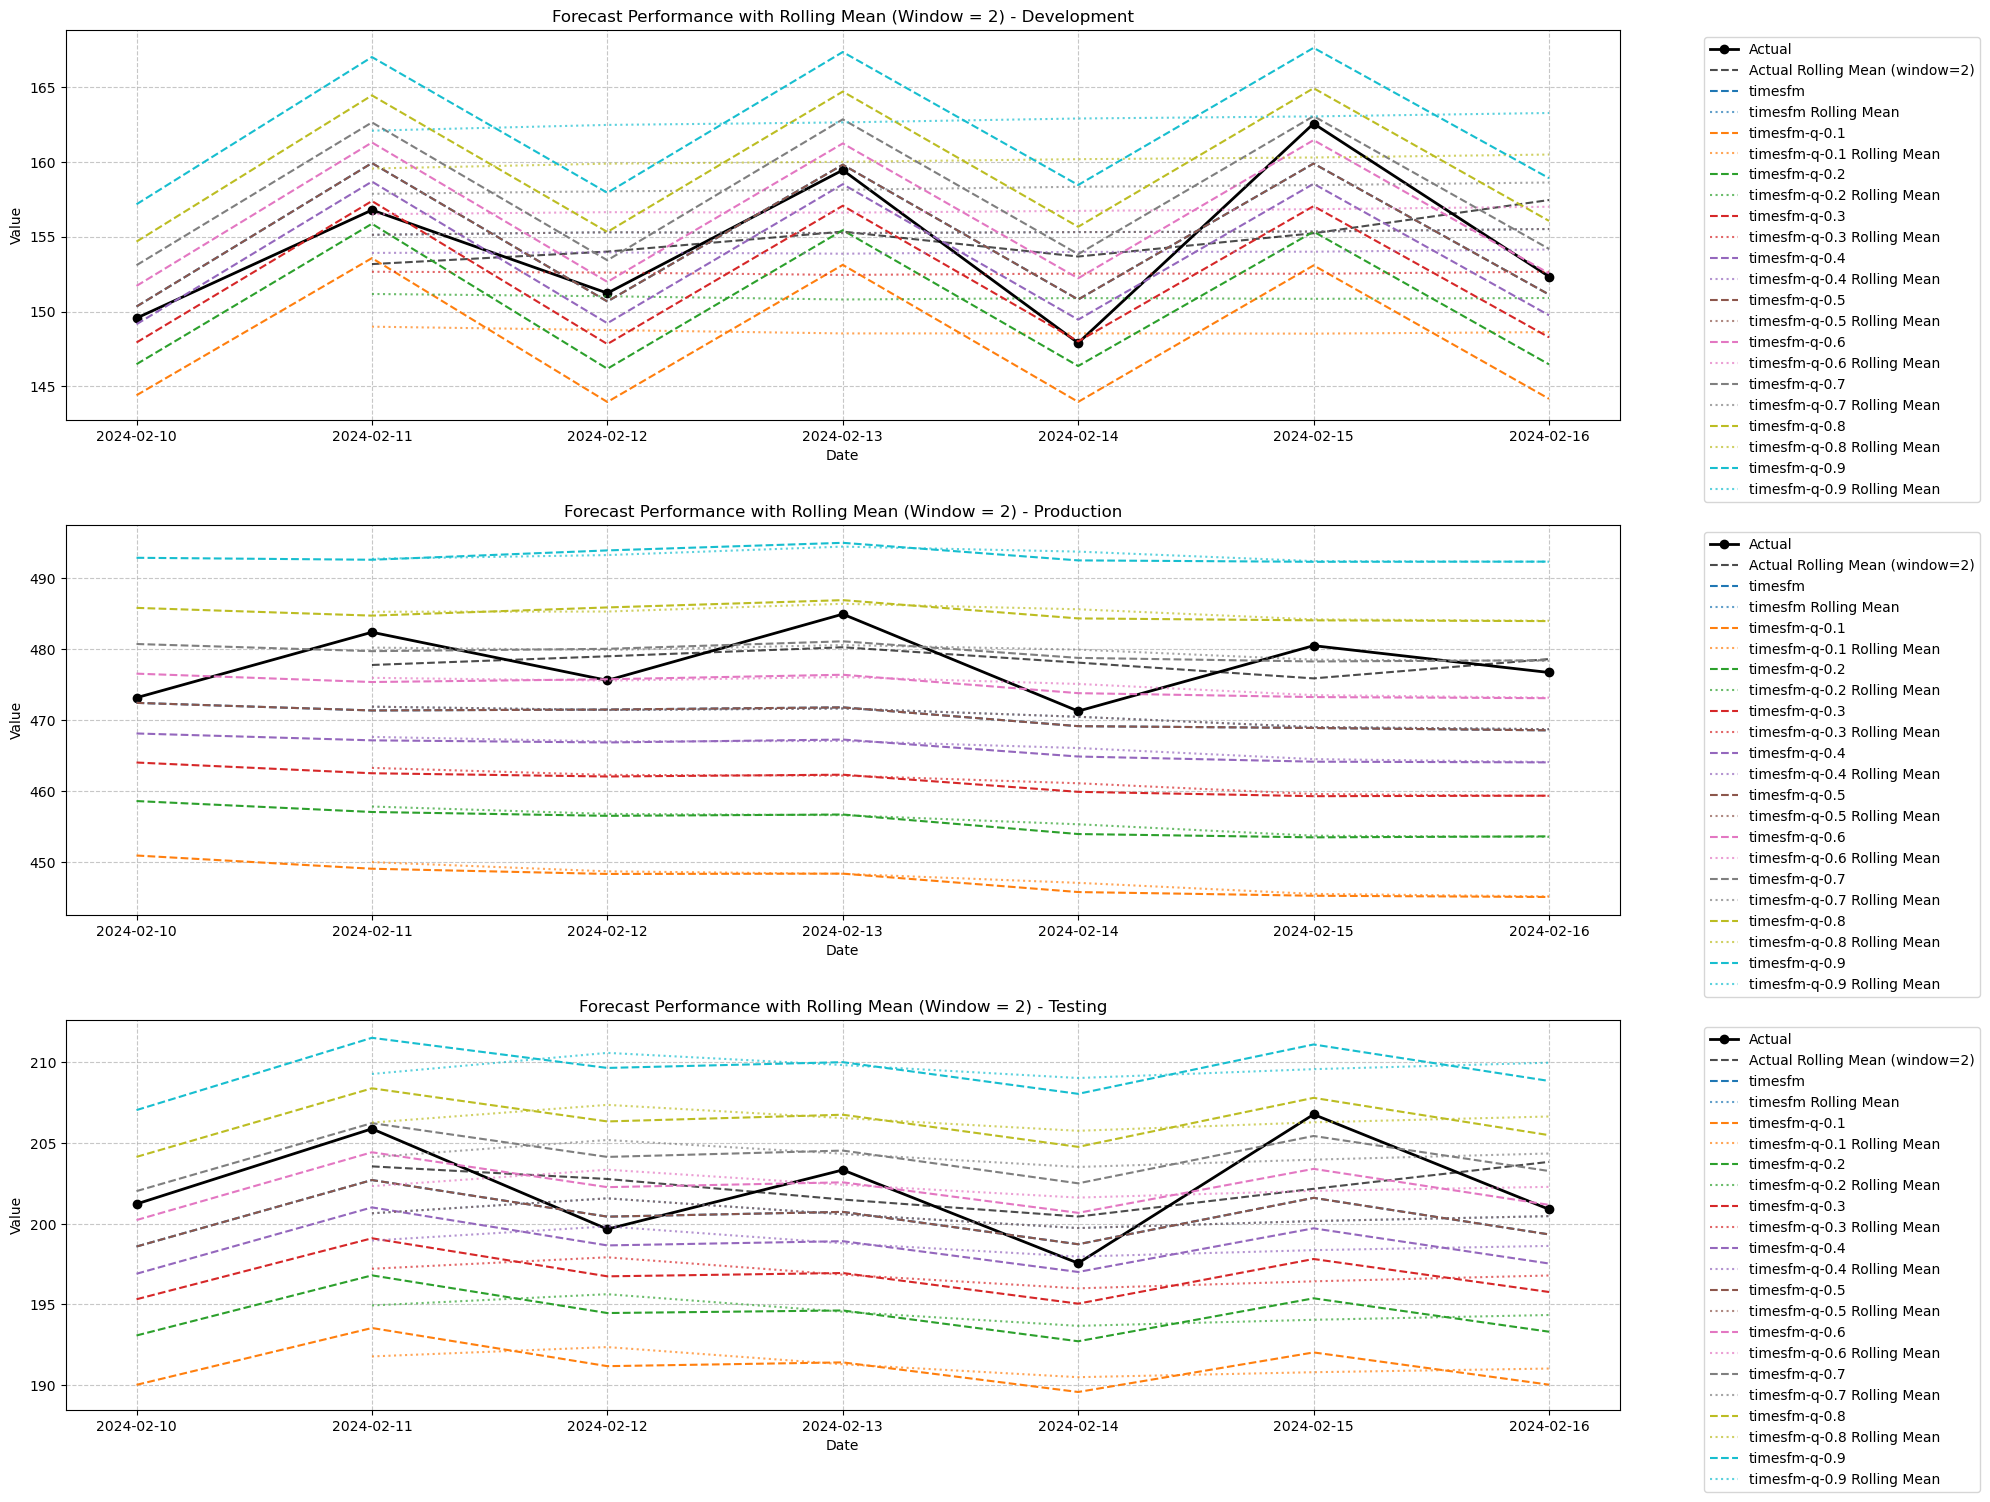

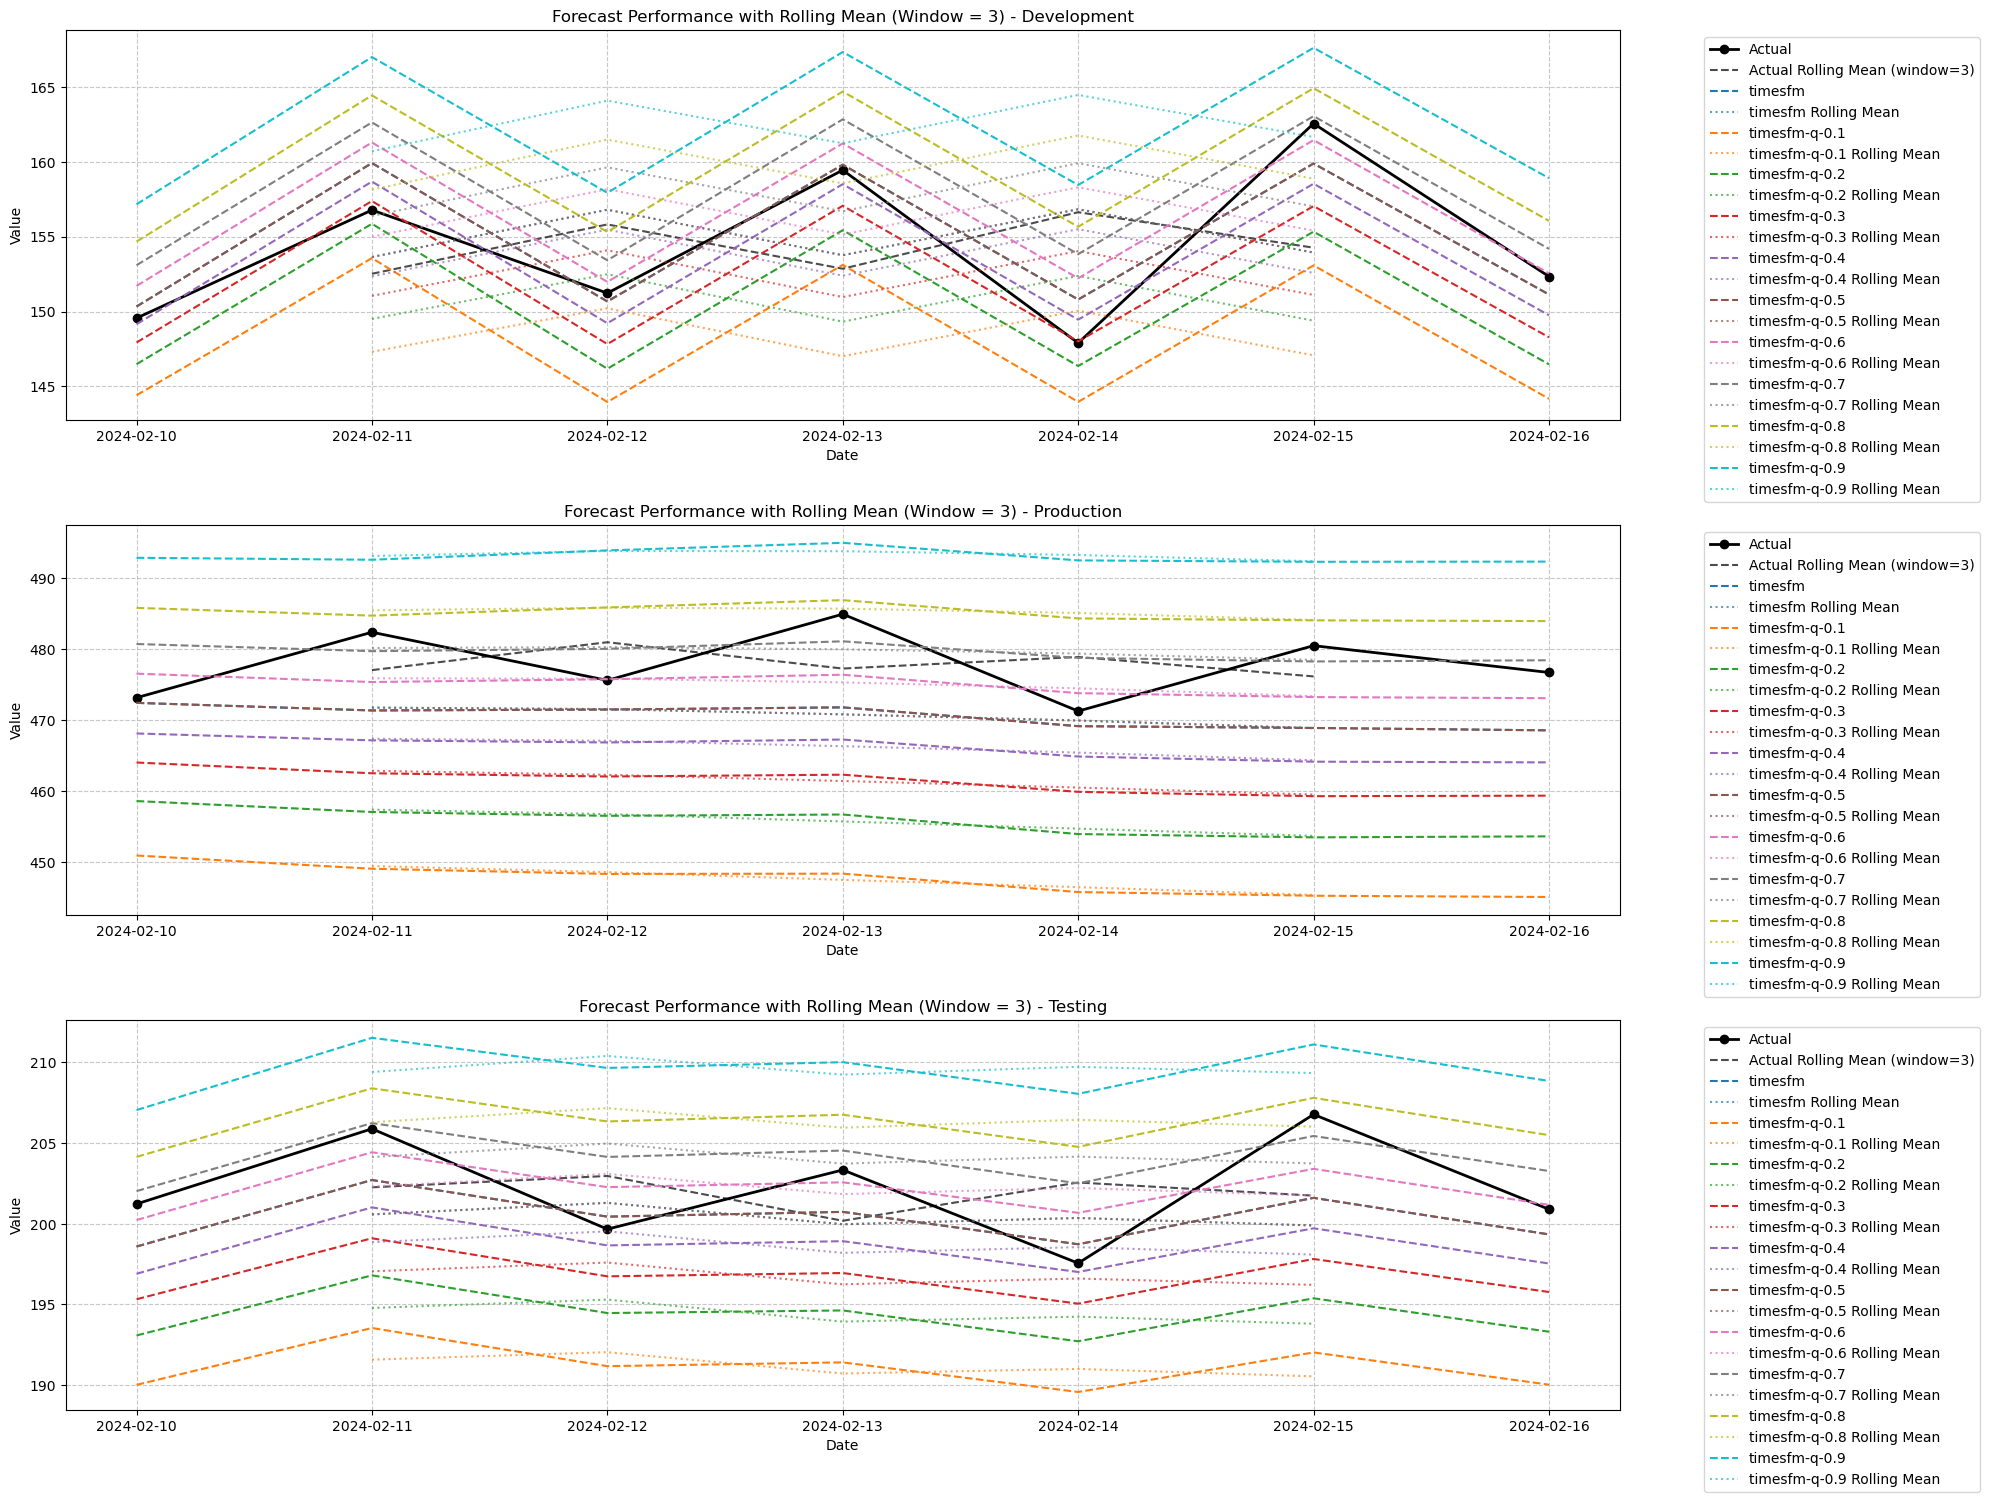

In [26]:
forecast_file = 'Output_Forecast.csv'
verification_file = 'verify_data.csv'
plot_rolling_mean_forecast(forecast_file, verification_file, window_size=2)
plot_rolling_mean_forecast(forecast_file, verification_file, window_size=3)



ValueError: x and y must have same first dimension, but have shapes (7,) and (11,)

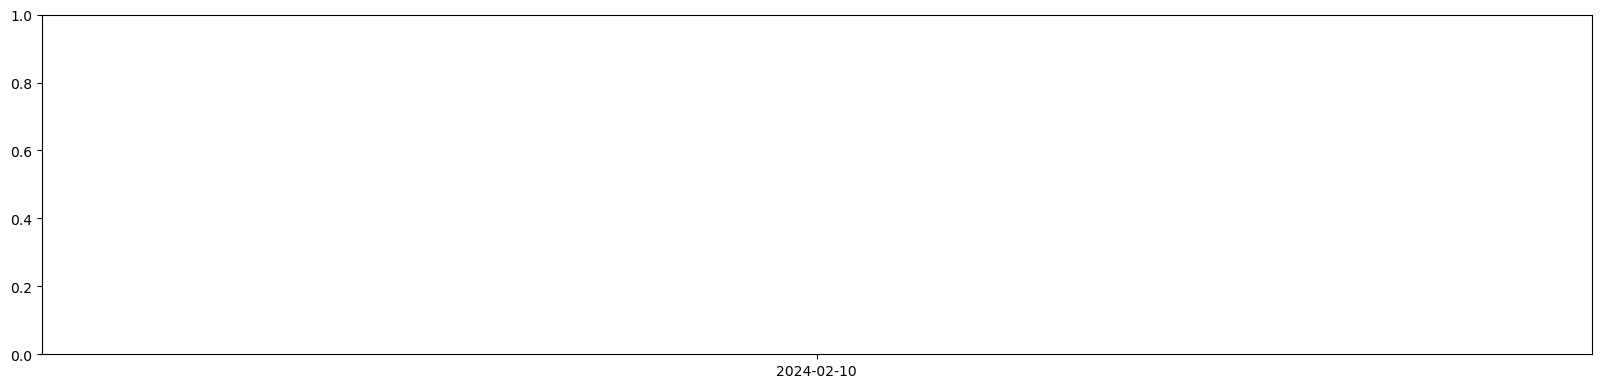

In [25]:
# Plot residuals
plot_residuals(forecast_file, verification_file)

ValueError: could not broadcast input array from shape (7,) into shape (11,)

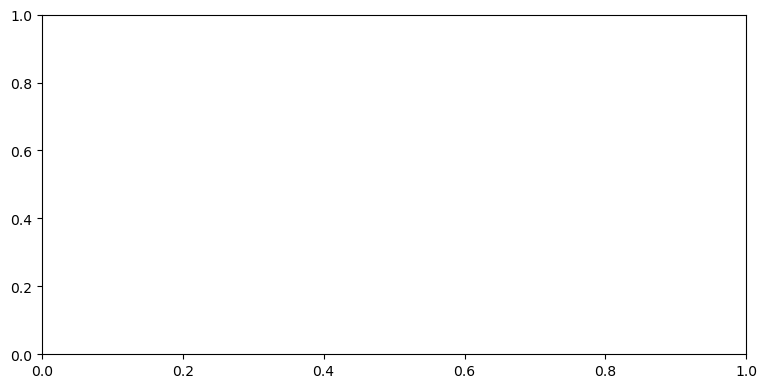

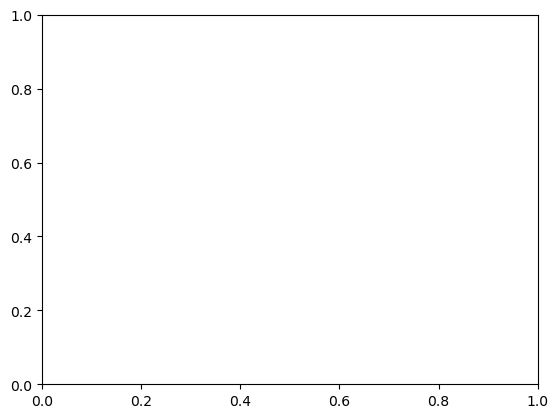

In [28]:
plot_autocorrelation('verify_data.csv')